# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


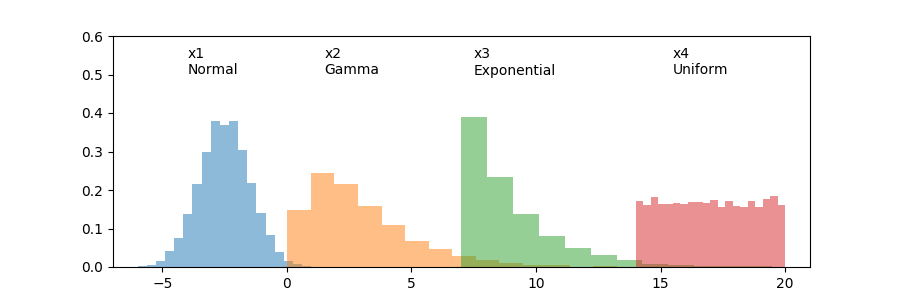

In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [12]:
import pandas as pd
import numpy as np
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


<IPython.core.display.Javascript object>


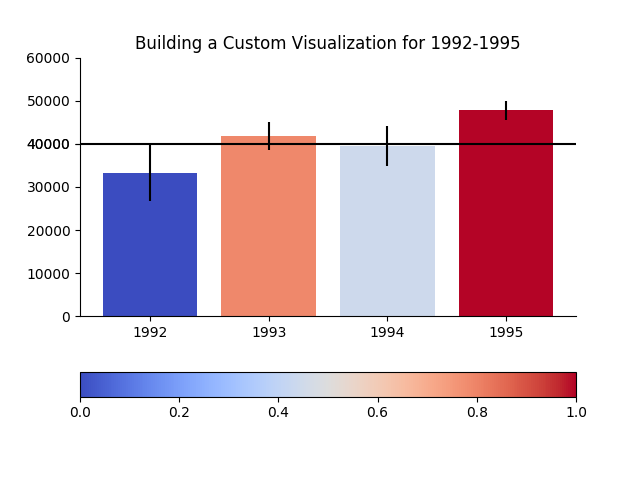

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import scipy.stats as ss
plt.figure()

means = df.mean(axis = 1)

std = df.std(axis = 1)

n = df.shape[1]

yerr= std/np.sqrt(n) * ss.norm.ppf(1-0.05/2)

conf_ints = [ss.norm.interval(0.95, loc = mu, scale = se) for mu, se in zip(means, std/np.sqrt(n))]


def compute_probs(y, conf_ints):
    if y < np.min(conf_ints):
        result = 1
    elif y > np.max(conf_ints):
        result = 0
    else:
        result = (np.max(conf_ints) - y) / (np.max(conf_ints) - np.min(conf_ints))
    return result

y = 40000

probs  = [compute_probs(y, ci) for ci in conf_ints]


cmap = cm.get_cmap('coolwarm')

cpick = cm.ScalarMappable(cmap = cmap, norm = col.Normalize ( vmin= 0, vmax = 1))

cpick.set_array([1])

rects = plt.bar(range(len(df.T.columns)), means, yerr = yerr, color = cpick.to_rgba(probs))

plt.axhline(y = y, zorder = 1, color = 'k')

yt = plt.gca().get_yticks()

yt = np.append(yt, y)

plt.gca().set_yticks(yt)

plt.xticks(range(len(df.T.columns)), df.T.columns)

plt.gca().set_title('Building a Custom Visualization for 1992-1995')

cbar = plt.colorbar(cpick, orientation = "horizontal")

[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

plt.show()